In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix,
roc_curve, auc)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import joblib
import os

In [3]:
# Load the dataset 
data = pd.read_csv('creditcard.csv')  # Make sure the dataset is in the same folder or provide path

In [4]:
# Display the Data
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [14]:
#Check for missing values 
df= data.copy()
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
#Duplicated rows
df.duplicated().sum()

np.int64(1081)

In [17]:
df_cleaned = df.drop_duplicates().copy()
df_cleaned["Amount_log"] = np.log(df_cleaned["Amount"].replace(0, 0.01))

# Exploratoy Data Analisis(EDA)


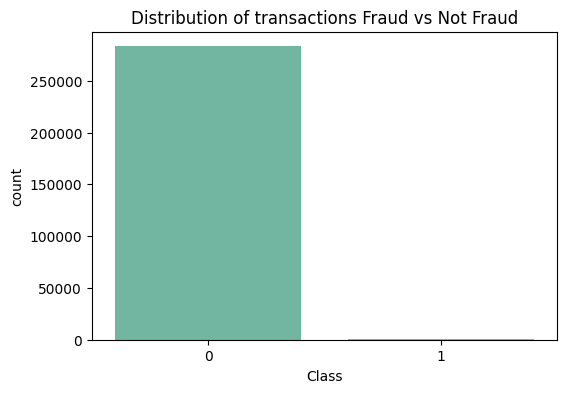

Percentage of fraud: 0.1727%


In [18]:
#Distribution for variable class
plt.figure(figsize=(6,4))
sns.countplot(data=df_cleaned, x="Class", palette="Set2")
plt.title("Distribution of transactions Fraud vs Not Fraud")
plt.show()

fraud_pct = df["Class"].mean() *100
print(f"Percentage of fraud: {fraud_pct:.4f}%")

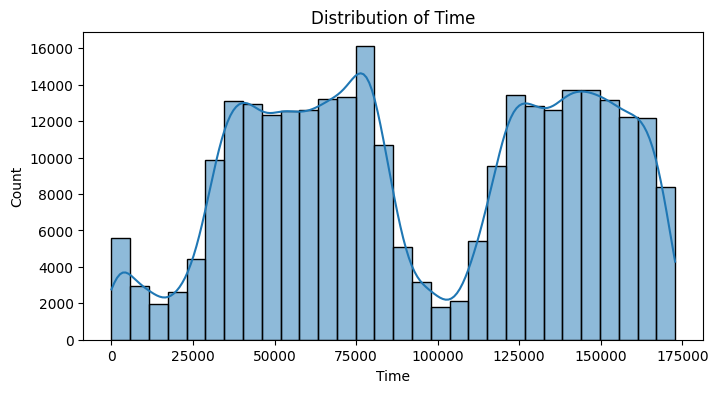

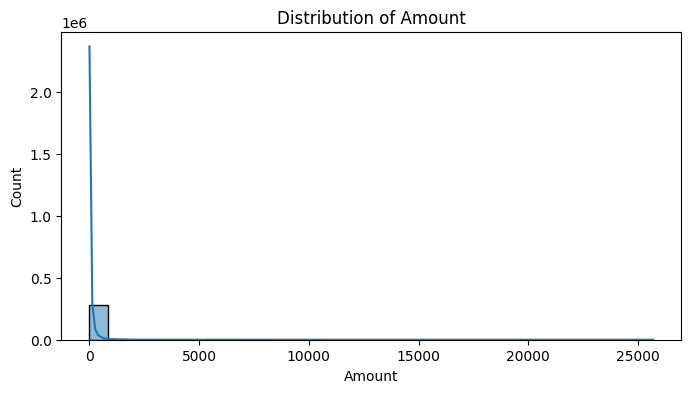

In [19]:
#Distribution for Time
num_cols=["Time","Amount"]
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

<Axes: xlabel='Amount_log', ylabel='Count'>

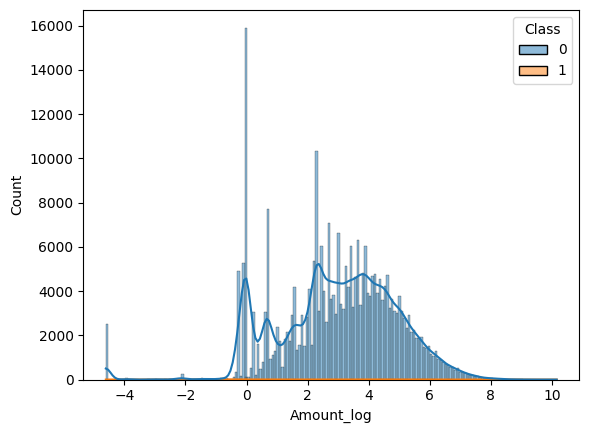

In [22]:
#Distribution of amount with class
sns.histplot(data=df_cleaned, x="Amount_log", hue="Class", log_scale=False, kde=True)

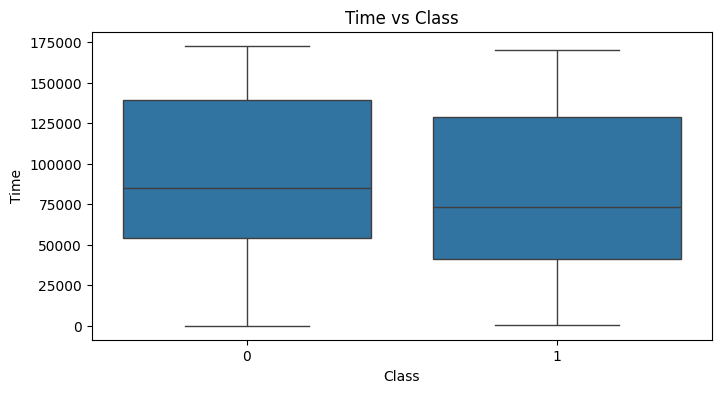

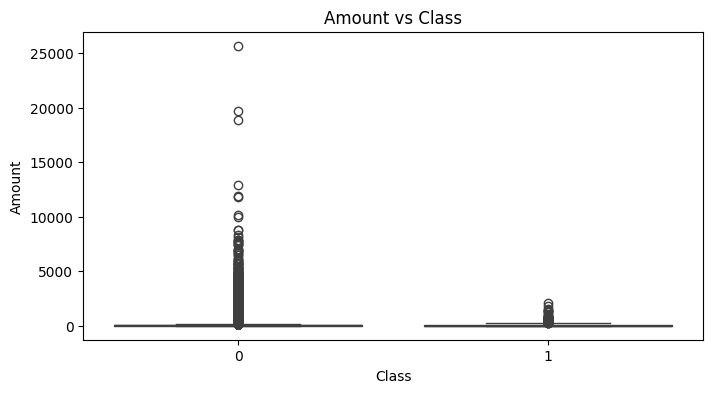

In [21]:
#BoxPlot
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x="Class", y=col, data=df_cleaned)
    plt.title(f"{col} vs Class")
    plt.show()

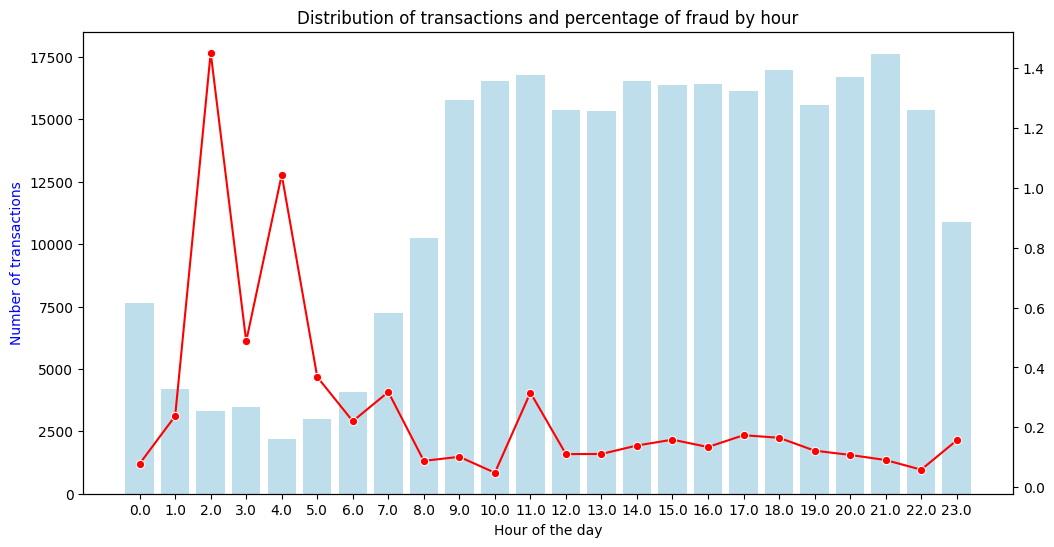

In [23]:
#Distribution of Transations and Fraud Percentage by Hour
#Create new column with hour of transaction
df_cleaned["Hour"] = (df_cleaned["Time"] // 3600) % 24

fraud_by_hour = df_cleaned.groupby("Hour")["Class"].mean() * 100
transactions_by_hour = df_cleaned.groupby("Hour")["Class"].count()

#Create graphic
fig, ax1 = plt.subplots(figsize=(12,6))

sns.barplot(x=fraud_by_hour.index, y= transactions_by_hour.values, color="skyblue", ax= ax1, alpha=0.6)
ax1.set_ylabel("Number of transactions", color="blue")
ax1.set_xlabel("Hour of the day")

#Percentage of fraud
ax2 = ax1.twinx()
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, color="red", marker="o", ax=ax2)


plt.title("Distribution of transactions and percentage of fraud by hour")
plt.show()

In [24]:
'''This Datas is highly unbalanced 

0 -> Normal Transaction 
1 -> Fraud Transacion'''

'This Datas is highly unbalanced \n\n0 -> Normal Transaction \n1 -> Fraud Transacion'

In [25]:
# Separating the data for analysis
not_fraud = data[data["Class"]==0]
fraud = data[data["Class"]==1]

In [26]:
not_fraud.shape

(284315, 31)

In [27]:
fraud.shape

(492, 31)

In [28]:
# Statistical measure of the amount data
not_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [29]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [30]:
# Using a Under-Sampling for distrube a equal data for normal transacion
nfraud_sample = not_fraud.sample(n=492)

In [31]:
# creating a new Data set using DataFrame
new_dataSet = pd.concat([nfraud_sample, fraud],axis = 0)

In [32]:
new_dataSet.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
27811,34710.0,-0.571306,0.665672,1.578616,0.555032,0.950130,-0.178848,1.525512,-0.989976,-0.001266,...,-0.052118,0.670560,-0.301255,0.026139,-0.285596,-0.462338,-0.636111,-0.597078,39.95,0
176911,122962.0,-0.292306,0.484247,1.624067,-0.604991,0.723865,0.456202,0.763978,-0.427518,0.671919,...,0.173875,1.082876,-0.564123,-0.983141,0.166286,-0.067585,-0.283716,-0.307847,17.95,0
185330,126624.0,1.987782,-1.859751,-0.831905,-1.570340,-1.379030,-0.055373,-1.230182,-0.000288,-1.355664,...,-0.010444,0.156994,0.178437,0.695975,-0.353055,-0.240718,-0.001565,-0.025111,143.20,0
231965,146995.0,-3.141127,0.096520,-1.789333,-0.016598,0.386433,-1.345752,-0.277316,0.970038,-0.276536,...,-0.257934,-1.233234,-0.641486,0.637829,-0.085837,0.118926,-0.570897,-0.394564,10.77,0
190311,128779.0,2.067343,-1.111196,-0.683828,-0.895219,-0.923840,-0.452682,-0.825077,-0.150358,0.033476,...,-0.038771,-0.223433,0.231161,-0.662106,-0.412916,-0.453931,0.002092,-0.033119,83.00,0


In [33]:
new_dataSet.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [34]:
new_dataSet["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [35]:
# Features and target
X = new_dataSet.drop(columns="Class",axis = 1)
y = new_dataSet["Class"]

In [36]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
# Apply SMOTE to training set
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [38]:
# -----------------------------
# 1️⃣ Logistic Regression
# -----------------------------
print("\n🔹 Logistic Regression Results")
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# -----------------------------
# 2️⃣ Random Forest
# -----------------------------
print("\n🔹 Random Forest Results")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# -----------------------------
# 3️⃣ Neural Network (MLP)
# -----------------------------
print("\n🔹 Neural Network (MLPClassifier) Results")
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


🔹 Logistic Regression Results
[[95  4]
 [ 5 93]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        99
           1       0.96      0.95      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197


🔹 Random Forest Results
[[94  5]
 [ 4 94]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        99
           1       0.95      0.96      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197


🔹 Neural Network (MLPClassifier) Results
[[90  9]
 [ 3 95]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        99
           1       0.91      0.97      0.94        98

    accuracy               

In [39]:
# Function to evaluate model
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    print(f"\n🔹 {name} Results")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc, name

In [40]:
# Initialize models
lr_model = LogisticRegression()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, random_state=42)

In [41]:
# Train models
lr_model.fit(X_train_resampled, y_train_resampled)
rf_model.fit(X_train_resampled, y_train_resampled)
mlp_model.fit(X_train_resampled, y_train_resampled)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, random_state=42)

In [42]:
# Evaluate models
results = []
results.append(evaluate_model(lr_model, X_test, y_test, "Logistic Regression"))
results.append(evaluate_model(rf_model, X_test, y_test, "Random Forest"))
results.append(evaluate_model(mlp_model, X_test, y_test, "Neural Network (MLP)"))


🔹 Logistic Regression Results
[[95  4]
 [ 5 93]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        99
           1       0.96      0.95      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197


🔹 Random Forest Results
[[94  5]
 [ 4 94]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        99
           1       0.95      0.96      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197


🔹 Neural Network (MLP) Results
[[89 10]
 [ 3 95]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        99
           1       0.90      0.97      0.94        98

    accuracy                         

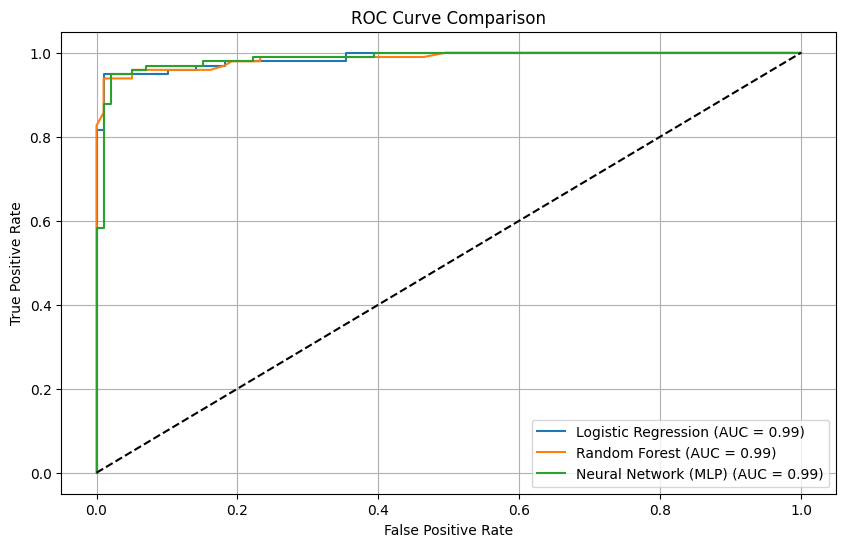

In [43]:
# Plot ROC Curves
plt.figure(figsize=(10, 6))
for fpr, tpr, roc_auc, label in results:
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

In [44]:
# Save logistic regression model
import joblib
joblib.dump(lr_model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']